#### The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

#### 1 a)

#### Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

Delhi-NCR 7947
RoIndia 705


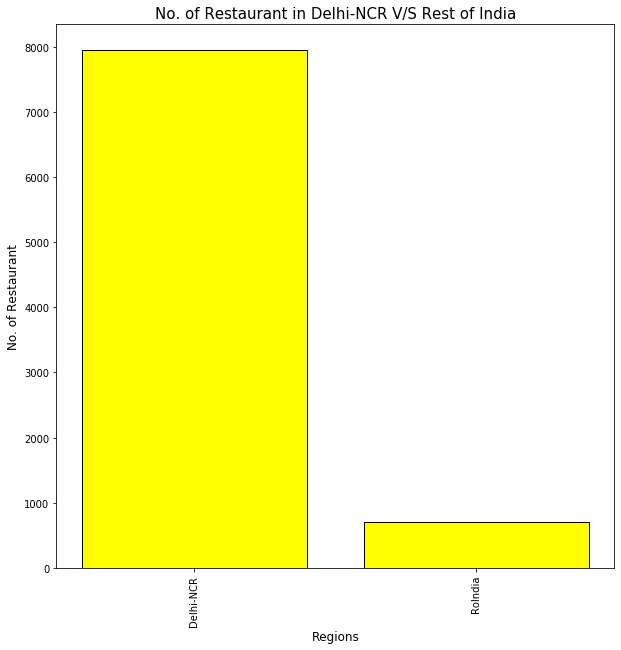

In [6]:
#setpath
path = 'zomato2.csv'

#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 

df = pd.read_csv(path)
df = df[df['Country Code'] == 1]

#replace error entries
df['City'].dropna(inplace=True)
df['City'].replace("New Delhi","Delhi-NCR",inplace=True)
df['City'].replace("Ghaziabad","Delhi-NCR",inplace=True)
df['City'].replace("Noida","Delhi-NCR",inplace=True)
df['City'].replace("Gurgaon","Delhi-NCR",inplace=True)
df['City'].replace("Faridabad","Delhi-NCR",inplace=True)


#Set Rest of India 
df['City'] = np.where(df['City']!="Delhi-NCR",'RoIndia','Delhi-NCR')

m=df.City.value_counts()
x=m.index
y=m.values
for i in range(len(m)):
    print(x[i],y[i])
    
#Plot Graph
plt.title('No. of Restaurant in Delhi-NCR V/S Rest of India', fontsize="15")
plt.xlabel('Regions',fontsize="12")
plt.ylabel('No. of Restaurant',fontsize="12")
plt.xticks(rotation = 90)
matplotlib.rcParams['figure.figsize'] = [10,10]
plt.bar(x,y,color = 'yellow', edgecolor = 'black')
plt.show()

#### 1 b)

#### Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India. Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [3]:
#setpath
path = 'zomato2.csv'

#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 

df = pd.read_csv(path)
df = df[df['Country Code'] == 1]

#replace error entries
df['City'].dropna(inplace=True)
df['City'].replace("New Delhi","Delhi-NCR",inplace=True)
df['City'].replace("Ghaziabad","Delhi-NCR",inplace=True)
df['City'].replace("Noida","Delhi-NCR",inplace=True)
df['City'].replace("Gurgaon","Delhi-NCR",inplace=True)
df['City'].replace("Faridabad","Delhi-NCR",inplace=True)


#Set Rest of India 
df['City'] = np.where(df['City']!="Delhi-NCR",'RoIndia','Delhi-NCR')

D_Set = set() # Delhi-NCR set
R_Set = set() # Non- setDelhi-NCR

# Data frame where Delhi-NCR is considered
m = df[df['City']=="Delhi-NCR"]

cuisine_dict={}
m['Cuisines'].dropna(inplace=True)

#convert function
def convertCuisines(name):
    l = [x.strip() for x in name.split(',')]
    for i in l:
        if i != '':
            cuisine_dict[i] = cuisine_dict.get(i,0) + 1
            
m['Cuisines'].apply(convertCuisines)

sorted_x = sorted(cuisine_dict.items(), key=lambda kv: kv[1], reverse=True)

for i in range(len(sorted_x)):
    D_Set.add(sorted_x[i][0])
    


# Data frame where Delhi-NCR is not considered
m = df[df['City']!="Delhi-NCR"]



cuisine_dict={}
m['Cuisines'].dropna(inplace=True)

#convert function
def convertCuisines2(name):
    l = [x.strip() for x in name.split(',')]
    for i in l:
        if i != '':
            cuisine_dict[i] = cuisine_dict.get(i,0) + 1
            
m['Cuisines'].apply(convertCuisines2)

sorted_x = sorted(cuisine_dict.items(), key=lambda kv: kv[1], reverse=True)

for i in range(len(sorted_x)):
    R_Set.add(sorted_x[i][0])
    
print("Cuisines not served are:")
print(R_Set.difference(D_Set))

Cuisines not served are:
{'BBQ', 'Cajun', 'German', 'Malwani'}


In [8]:
#imp library
import requests 

user_key='3754f0440b3026cde542ed69af9f499a' 
basic_api='https://developers.zomato.com/api/v2.1' 

params={'city_id':1} 
header={"User-agent": "curl/7.43.0",'Accept': 'application/json','user-key':user_key} 
response=requests.get(basic_api+'/cuisines',headers=header,params=params) 

#finding cuisine id for Malwani
cuisine_id=0 
for i in response.json().get('cuisines'): 
    if(i.get('cuisine').get('cuisine_name')=='Malwani'): 
        cuisine_id=i.get('cuisine').get('cuisine_id') 
        cuid = cuisine_id
        
        
#Checking if any Malwani cuisine resturant in Delhi on Zomato API
d={}
token='38f5795b04781ebdf58353b71c437e72' 
headers={'user-key' : token, 'Accept': 'application/json'} 

params = {'count':10,'entity_id':1 ,'entity_type':'city','cuisines': str(cuid), 'sort': 'rating' , 'order': 'desc'}
response=requests.get('https://developers.zomato.com/api/v2.1/search',params=params, headers=headers) 
ans = response.json()
for i in ans["restaurants"]:
        print(i["restaurant"]['name'],"   :   ",i["restaurant"]['cuisines'])

# Checked using Zomato API the cuisines are served but error is due to incomplete dataset

Backwater Bistro    :    Chinese, Malwani, South Indian, Biryani, Continental


#### 1 c)

#### Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

In [9]:
#setpath
path = 'zomato2.csv'

#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 

df = pd.read_csv(path)
df = df[df['Country Code'] == 1]

#replace error entries
df['City'].dropna(inplace=True)
df['City'].replace("New Delhi","Delhi-NCR",inplace=True)
df['City'].replace("Ghaziabad","Delhi-NCR",inplace=True)
df['City'].replace("Noida","Delhi-NCR",inplace=True)
df['City'].replace("Gurgaon","Delhi-NCR",inplace=True)
df['City'].replace("Faridabad","Delhi-NCR",inplace=True)



df['City'] = np.where(df['City']!="Delhi-NCR",'RoIndia','Delhi-NCR')

# Data frame where Delhi-NCR is considered
m = df[df['City']=="Delhi-NCR"]

cuisine_dict={}
m['Cuisines'].dropna(inplace=True)

#convert function
def convertCuisines(name):
    l = [x.strip() for x in name.split(',')]
    for i in l:
        if i != '':
            cuisine_dict[i] = cuisine_dict.get(i,0) + 1
            
m['Cuisines'].apply(convertCuisines)

sorted_x = sorted(cuisine_dict.items(), key=lambda kv: kv[1], reverse=True)

print("Cuisines served in NCR-Delhi:")
for i in range(10):
    print(sorted_x[i][0],sorted_x[i][1])
    
    
print()

# Data frame where Delhi-NCR is not considered
m = df[df['City']!="Delhi-NCR"]

cuisine_dict={}
m['Cuisines'].dropna(inplace=True)

#convert function
def convertCuisines2(name):
    l = [x.strip() for x in name.split(',')]
    for i in l:
        if i != '':
            cuisine_dict[i] = cuisine_dict.get(i,0) + 1
            
m['Cuisines'].apply(convertCuisines2)

sorted_x = sorted(cuisine_dict.items(), key=lambda kv: kv[1], reverse=True)

print("Cuisines served outside NCR-Delhi:")

for i in range(10):
    print(sorted_x[i][0],sorted_x[i][1])

Cuisines served in NCR-Delhi:
North Indian 3597
Chinese 2448
Fast Food 1866
Mughlai 933
Bakery 697
South Indian 569
Continental 547
Desserts 542
Street Food 538
Italian 535

Cuisines served outside NCR-Delhi:
North Indian 349
Chinese 242
Continental 177
Italian 147
Cafe 136
Fast Food 97
South Indian 62
Mughlai 59
Desserts 55
Mexican 50


#### 1 a)

#### Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

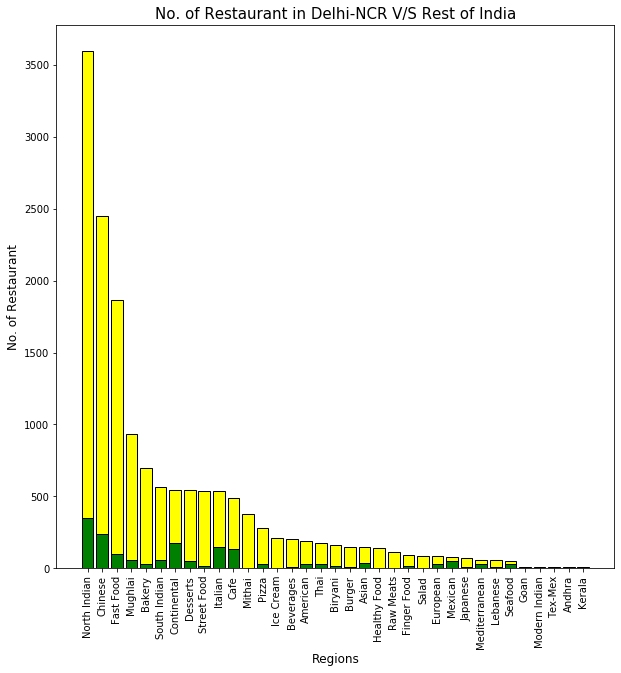

In [10]:
#setpath
path = 'zomato2.csv'

#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 

df = pd.read_csv(path)
df = df[df['Country Code'] == 1]

#replace error entries
df['City'].dropna(inplace=True)
df['City'].replace("New Delhi","Delhi-NCR",inplace=True)
df['City'].replace("Ghaziabad","Delhi-NCR",inplace=True)
df['City'].replace("Noida","Delhi-NCR",inplace=True)
df['City'].replace("Gurgaon","Delhi-NCR",inplace=True)
df['City'].replace("Faridabad","Delhi-NCR",inplace=True)



df['City'] = np.where(df['City']!="Delhi-NCR",'RoIndia','Delhi-NCR')

m = df[df['City']=="Delhi-NCR"]



city={}
m['Cuisines'].dropna(inplace=True)

#convert function
def convertInvestorsMultiple(name):
    l = [x.strip() for x in name.split(',')]
    for i in l:
        if i != '':
            city[i] = city.get(i,0) + 1
            
m['Cuisines'].apply(convertInvestorsMultiple)

x1=[]
y1=[]
sorted_x = sorted(city.items(), key=lambda kv: kv[1], reverse=True)
for i in range(20):
    x1.append(sorted_x[i][0])
    y1.append(sorted_x[i][1])
    
    
print()

m = df[df['City']!="Delhi-NCR"]



city={}
m['Cuisines'].dropna(inplace=True)

#convert function
def convertInvestorsMultiple(name):
    l = [x.strip() for x in name.split(',')]
    for i in l:
        if i != '':
            city[i] = city.get(i,0) + 1
            
m['Cuisines'].apply(convertInvestorsMultiple)
x2=[]
y2=[]
sorted_x = sorted(city.items(), key=lambda kv: kv[1], reverse=True)

for i in range(20):
    x2.append(sorted_x[i][0])
    y2.append(sorted_x[i][1])
    
#Plot Graph
plt.title('No. of Restaurant in Delhi-NCR V/S Rest of India', fontsize="15")
plt.xlabel('Regions',fontsize="12")
plt.ylabel('No. of Restaurant',fontsize="12")
plt.xticks(rotation = 90)
matplotlib.rcParams['figure.figsize'] = [10,10]
plt.bar(x1,y1,color = 'yellow', edgecolor = 'black')
plt.bar(x2,y2,color = 'green', edgecolor = 'black')
plt.show()